<a href="https://colab.research.google.com/github/GodaBac/BachelorThesis/blob/main/SARIMA/SARIMA_with_standardized_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pmdarima import auto_arima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
from datetime import datetime

input_file_path = '/content/drive/MyDrive/Bakalauras/duomenys.csv'

# Open the input CSV file
with open(input_file_path, 'r') as input_file:
    reader = csv.reader(input_file)

    value_names = next(reader)

    # Create an empty list to store the updated rows
    updated_rows = []

    # Loop through each row in the input file
    for row in reader:
         # Try to parse the date string as a datetime object
        try:
            date_str = row[0]
            date_obj = datetime.strptime(date_str, '%d-%m-%Y')
        except ValueError:
            # If the date string is not in the expected format, skip this row
            continue

        # Format the date object as a string in the new format
        new_date_str = date_obj.strftime('%Y-%m-%d')

        # Update the date value in the row
        row[0] = new_date_str
        # Append the updated row to the list of updated rows
        updated_rows.append(row)

# Convert the list of updated rows to a dataframe
df = pd.DataFrame(updated_rows, columns=value_names)

In [ ]:
# Convert the date column to a datetime object
df['DT'] = pd.to_datetime(df['DT'], format='%Y-%m-%d')

# Set the date column as the index of the dataframe
df.set_index('DT', inplace=True)
df['ANTAL_01'] = df['ANTAL_01'].astype(int)
df = df.iloc[::-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
# prepare data for standardization
values = df.values
print(values)
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
 print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
 print(inversed[i])
df['ANTAL_01'] = normalized
print(df)

[[46084]
 [46026]
 [46108]
 ...
 [30152]
 [30121]
 [30090]]
Mean: 40906.524202, StandardDeviation: 4750.513865
[1.089877]
[1.07766779]
[1.09492908]
[1.07114218]
[1.06251154]
[46084.]
[46026.]
[46108.]
[45995.]
[45954.]
            ANTAL_01
DT                  
2015-12-31  1.089877
2016-01-04  1.077668
2016-01-05  1.094929
2016-01-06  1.071142
2016-01-07  1.062512
...              ...
2022-12-15 -2.236921
2022-12-16 -2.251025
2022-12-19 -2.263865
2022-12-20 -2.270391
2022-12-21 -2.276917

[1818 rows x 1 columns]


In [ ]:
#training and test
training = df.iloc[:-16,:]
test = df.iloc[-16:, :]

In [ ]:
#SARIMA model
# Seasonal - fit stepwise auto-ARIMA
smodel = auto_arima(training, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=5,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[5] intercept   : AIC=inf, Time=9.05 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=-7.048, Time=0.39 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=-1920.456, Time=2.23 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=-1322.423, Time=1.57 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=-6.667, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=-1473.042, Time=0.38 sec
 ARIMA(1,0,0)(2,1,0)[5] intercept   : AIC=-2083.066, Time=10.04 sec
 ARIMA(1,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=9.16 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=5.54 sec
 ARIMA(0,0,0)(2,1,0)[5] intercept   : AIC=-218.121, Time=1.65 sec
 ARIMA(2,0,0)(2,1,0)[5] intercept   : AIC=-2117.755, Time=8.04 sec
 ARIMA(2,0,0)(1,1,0)[5] intercept   : AIC=-1964.849, Time=3.59 sec
 ARIMA(2,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=13.91 sec
 ARIMA(2,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=6.45 sec
 ARIMA(3,0,0)(2,1,0)[5] intercept   : AIC=-2152.378, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1802
Model:             SARIMAX(3, 0, 1)x(2, 1, 1, 5)   Log Likelihood                1237.487
Date:                           Tue, 02 May 2023   AIC                          -2456.973
Time:                                   18:41:33   BIC                          -2407.529
Sample:                                        0   HQIC                         -2438.720
                                          - 1802                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0010      0.000     -2.281      0.023      -0.002      -0.000
ar.L1          0.3308      0.180      1.834      0.067      -0.023       0.684
ar.L2          0.6273      0.133      4.710      0.000       0.366       0.888
ar.L3         -0.1320      0.035     -3.737      0.000      -0.201      -0.063
ma.L1          0.6198      0.182      3.411      0.001       0.264       0.976
ar.S.L5        0.0961      0.036      2.693      0.007       0.026       0.166
ar.S.L10       0.0845      0.025      3.375      0.001       0.035       0.134
ma.S.L5       -0.9456      0.011    -86.589      0.000      -0.967      -0.924
sigma2         0.0150      0.000     68.398      0.000       0.015       0.015
===================================================================================
Ljung-Box (L1) (Q):                   4.82   Jarque-Bera (JB):             87604.54
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             3.51
Prob(H) (two-sided):                  0.62   Kurtosis:                        36.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(training, order=(2,0,2), seasonal_order=(1,1,1,5))
model_fit = model.fit()
yhat = model_fit.forecast()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
#predictions
predictions = pd.Series(smodel.predict(n_periods = len(test)))
predictions.index = test.index
predictions[:5]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


DT
2022-11-30   -2.073849
2022-12-01   -2.062197
2022-12-02   -2.013948
2022-12-05   -1.991689
2022-12-06   -1.963084
dtype: float64

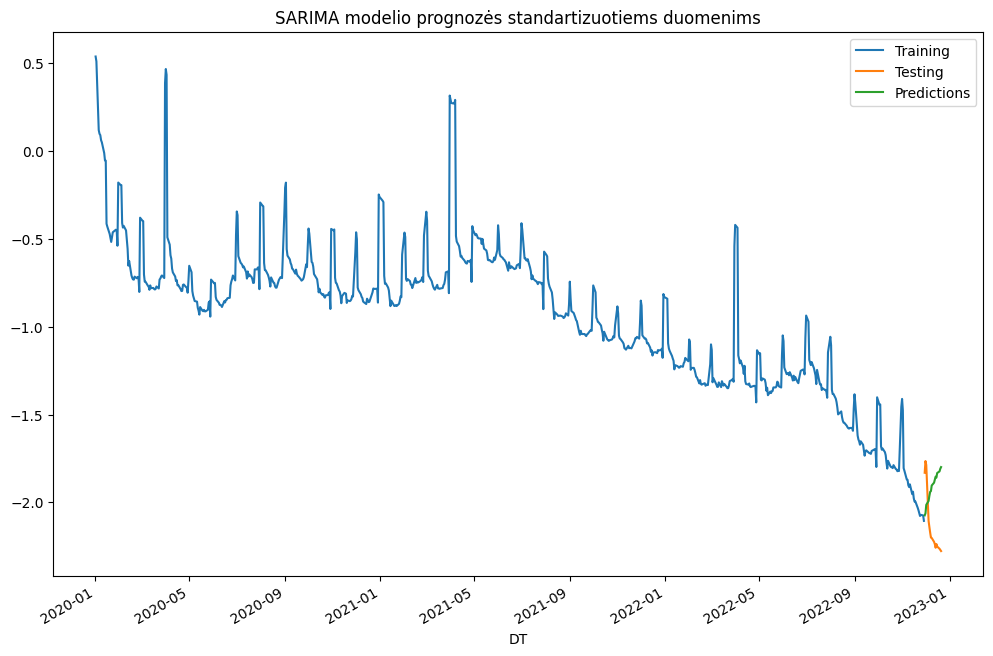

In [ ]:
#Visualization
import matplotlib.pyplot as plt
training['ANTAL_01']['2020-01-01':].plot(figsize=(12, 8), label='Training')
test['ANTAL_01'].plot(label='Testing')
predictions.plot(label='Predictions')
plt.title('SARIMA modelio prognozės standartizuotiems duomenims')
plt.legend()

In [ ]:
# inverse transform and print the first 5 rows
normalized_predictions = predictions.values.reshape((len(predictions.values), 1))
print(normalized_predictions)
inversed = scaler.inverse_transform(normalized_predictions)
print(inversed)

[[-2.07384928]
 [-2.06219728]
 [-2.01394829]
 [-1.99168931]
 [-1.96308365]
 [-1.94011401]
 [-1.93562451]
 [-1.90387026]
 [-1.88769841]
 [-1.87035558]
 [-1.85352382]
 [-1.85882478]
 [-1.83274515]
 [-1.82346359]
 [-1.80823696]
 [-1.79899349]]
[[31054.67442567]
 [31110.02745347]
 [31339.23493779]
 [31444.97650369]
 [31580.86812395]
 [31689.98571367]
 [31711.3131278 ]
 [31862.16211298]
 [31938.98674002]
 [32021.37406635]
 [32101.33358095]
 [32076.15132596]
 [32200.04296324]
 [32244.13513324]
 [32316.4694711 ]
 [32360.38068069]]
